In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

c:\Users\Noh\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
trainset = MNIST(root = './dataset', train = True, download = True)

testset = MNIST(root = './dataset', train = False, download = True)

In [5]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train

In [6]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test

In [7]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
trainset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [9]:
print(torch.max(trainset.data[0]))
print(torch.min(trainset.data[0]))

tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


In [10]:
trainset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [11]:
trainset.targets.shape

torch.Size([60000])

In [12]:
import numpy as np
print(np.unique(trainset.targets))
print(len(np.unique(trainset.targets)))

[0 1 2 3 4 5 6 7 8 9]
10


In [13]:
from torch.utils.data import DataLoader, Dataset

class custom_data(Dataset):
  def __init__(self, data):
    self.x = data.data
    self.y = data.targets

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    x = (self.x[index].view(28*28))/255.            # view : 2차원을 1차원으로 줄여줌 ( == reshape)
    y = self.y[index]

    return x.to(torch.float32), y.to(torch.long)


In [14]:
trainset_custom = custom_data(trainset)
train_loader = DataLoader(trainset_custom, batch_size = 64, shuffle = True)

testset_custom = custom_data(testset)
test_loader = DataLoader(testset_custom, batch_size = 64, shuffle = False)

In [15]:
image, label = next(iter(train_loader))

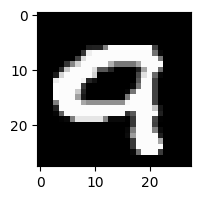

In [16]:
import matplotlib.pyplot as plt

img = image[0].view(28, 28)

plt.figure(figsize=(2, 2))
plt.imshow(img, cmap = 'gray')
plt.show()

In [38]:
import torch.nn.functional as F 

class myModel(nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.fc1 = nn.Linear(28*28,10)
        self.fc2 = nn.Linear(10,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        out = F.log_softmax(x, dim=1)

        return out


In [39]:
model = myModel()

from torchsummary import summary
summary(model, (1, 28*28), device = 'CPU')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]           7,850
            Linear-2                [-1, 1, 10]             110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [43]:
#from tqdm import tqdm

num_epochs = 1000

for epoch in range(num_epochs):
    for data, targets in train_loader:
        outputs = model(data)                # 1. prediction

        optimizer.zero_grad()                # 2. init optim
        loss = criterion(outputs, targets)   # 3. calculate loss
        loss.backward()                      # 4. calculate gradient
        optimizer.step()                     # 5. update the model

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 100, Loss: 0.34225210547447205
Epoch 200, Loss: 0.06785256415605545
Epoch 300, Loss: 0.024732857942581177
Epoch 400, Loss: 0.15854917466640472
Epoch 500, Loss: 0.14689406752586365
Epoch 600, Loss: 0.02138230949640274
Epoch 700, Loss: 0.08654215931892395
Epoch 800, Loss: 0.17955085635185242
Epoch 900, Loss: 0.13677923381328583
Epoch 1000, Loss: 0.11406257003545761


In [44]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        outputs = model(data)
         
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Accuracy : {100 * correct / total}%')

Accuracy : 93.0%
